# Sales Insight - Data Analysis Project using Power BI
This is a project created for self learning. 
It uses the sales transactions to study the data and display information to highlight sales trends and insights across various regions.


## Table of Contents
* [General Info](#general-information)
* [Technologies Used](#technologies-used)
* [Project Lifecycle](#ProjectLifecycle)
* [Usage](#usage)
* [Setup](#setup)
* [Project Status](#project-status)
* [Room for Improvement](#room-for-improvement)
* [Acknowledgements](#acknowledgements)


## General Information
- This is a Data Analysis end to end project executed using Power BI. It uses sales data from MySQL database to create Power BI dashboard that displays vital sales information that can be used by sales team or any other company stakeholders to get a holistic view of the sales across various regions.
- The purpose of this project to understand the various steps involved in a data analysis project and how they get executed in a real world scenario.
- This project is done for self learning purpose and is heavily influenced by a course on youtube channel codebasics.


## Technologies Used
- MySQL - version 8.0
- Microsoft Power BI Desktop - version 2.1102.683.0


## Project Lifecycle 

- Summarize the project requirement to understand the requirement so as to develop a solution that can be most relevant and answers all the questions. This is done using AIMS grid, which is a project management tool used to divide the project execution in 4 parts to get a holistic view of the project and its purpose. We do this for our current project and its indicated as seen below.
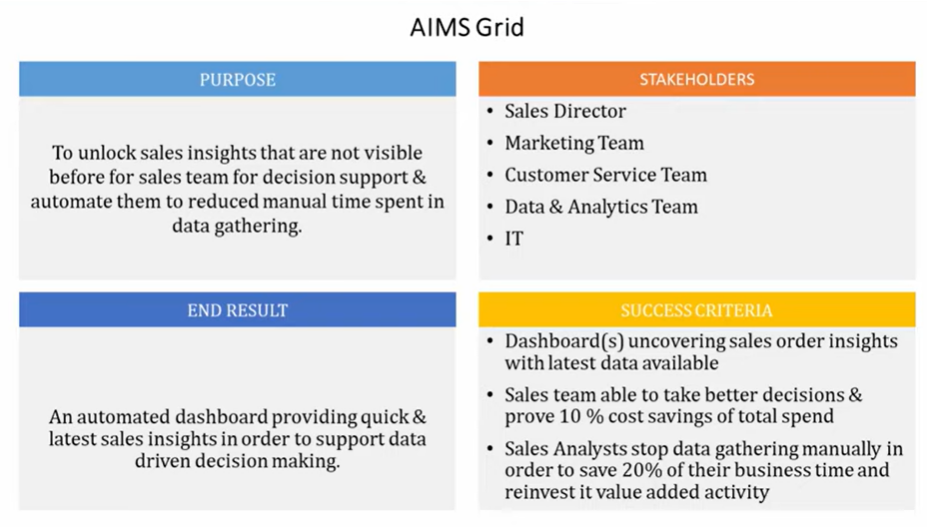


- Project plan and flow in a typical company for this type of a project can be similar to the one below. This image is used to understand the project teams involved and their responsibilities.
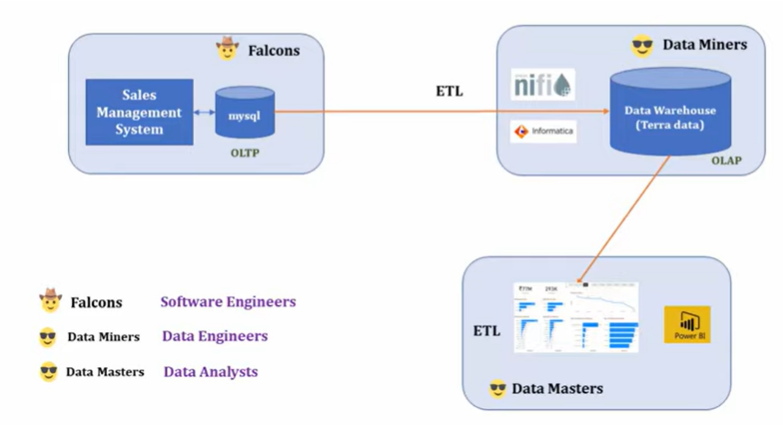


- Data modelling is the process of creating a visual representation of either a whole information system or parts of it to communicate connections between data points and structures. For our Project we use the star schema to establish relationships between various table entities.A star schema is a database organizational structure optimized for use in a data warehouse or business intelligence that uses a single large fact table to store transactional or measured data, and one or more smaller dimensional tables that store attributes about the data.
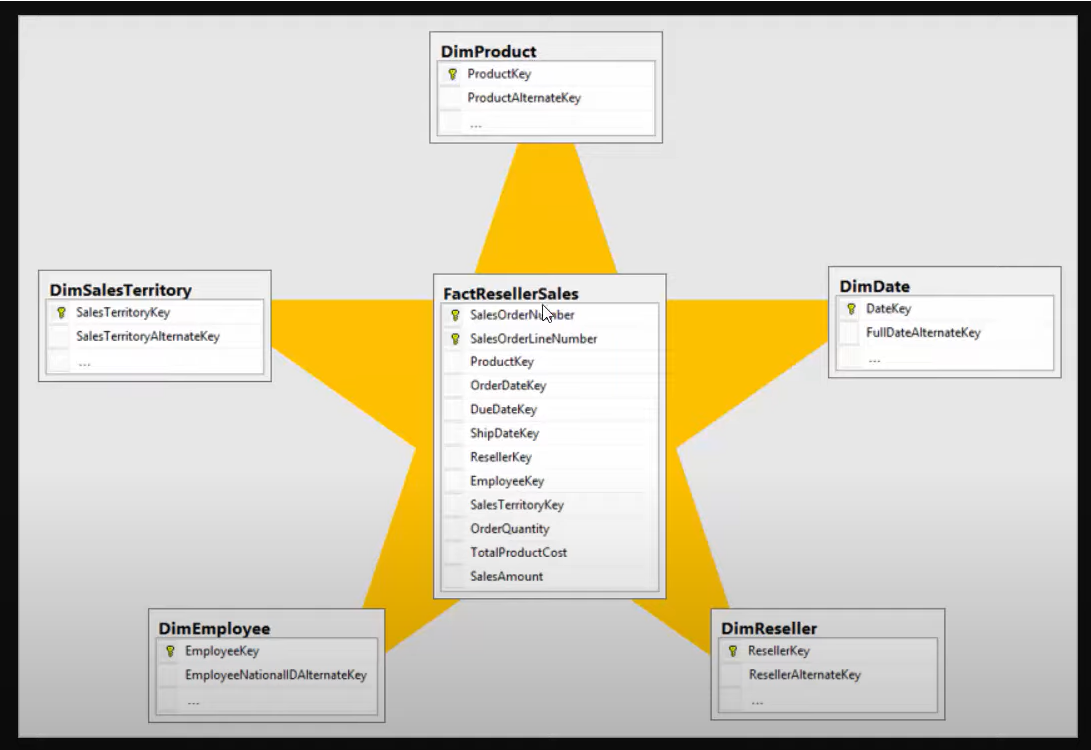
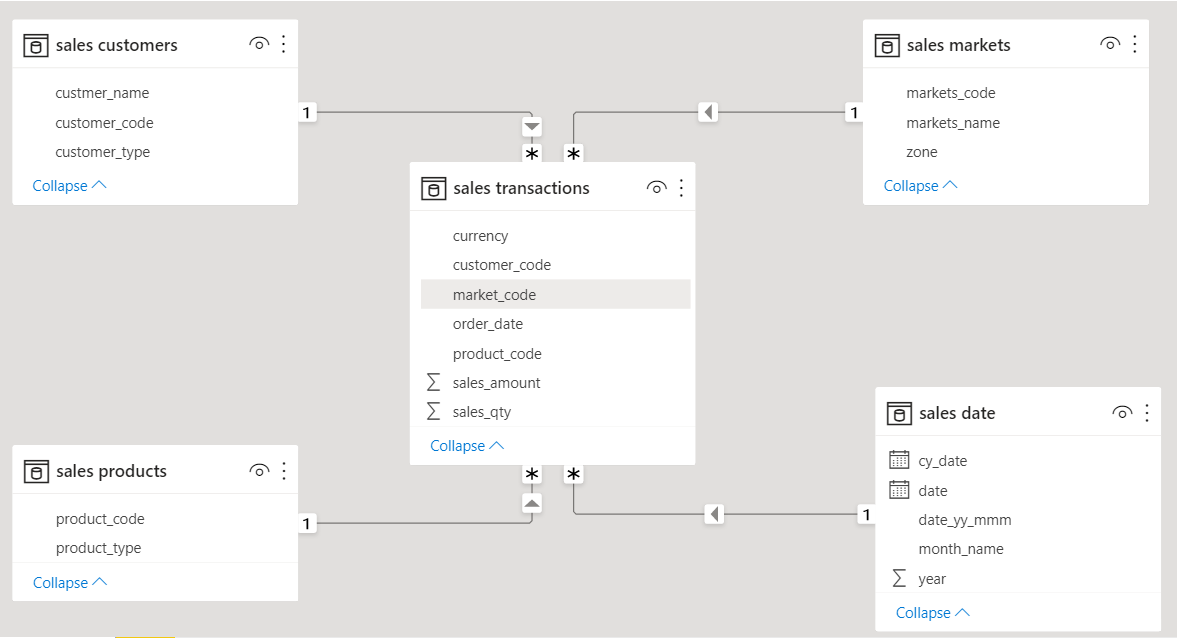


## Usage

### Data Analysis using SQL


1. Show all customer records

    `SELECT * FROM customers;`

2. Show total number of customers

    `SELECT count(*) FROM customers;`

3. Show transactions for Chennai market (market code for chennai is Mark001

    `SELECT * FROM transactions where market_code='Mark001';`

4. Show distrinct product codes that were sold in chennai

    `SELECT distinct product_code FROM transactions where market_code='Mark001';`

5. Show transactions where currency is US dollars

    `SELECT * from transactions where currency="USD"`

6. Show transactions in 2020 join by date table

    `SELECT transactions.*, date.* FROM transactions INNER JOIN date ON transactions.order_date=date.date where date.year=2020;`

7. Show total revenue in year 2020,

    `SELECT SUM(transactions.sales_amount) FROM transactions INNER JOIN date ON transactions.order_date=date.date where date.year=2020 and transactions.currency="INR\r" or transactions.currency="USD\r";`
	
8. Show total revenue in year 2020, January Month,

    `SELECT SUM(transactions.sales_amount) FROM transactions INNER JOIN date ON transactions.order_date=date.date where date.year=2020 and and date.month_name="January" and (transactions.currency="INR\r" or transactions.currency="USD\r");`
    
9. Show total revenue in year 2020 in Chennai

    `SELECT SUM(transactions.sales_amount) FROM transactions INNER JOIN date ON transactions.order_date=date.date where date.year=2020
and transactions.market_code="Mark001";`


### Data Wrangling/munging/cleaning steps: ETL (Extract, Transform and Load) using Power BI.

- We use power BI to perform data transformation. We do this by clicking Home -> Transform Data. This would open a Power Query window that will help you to filter and transform the data. For our project below mentioned data cleaning steps were performed.


1. From dataset - sales_markets, we removed markets - New York and Paris as they seemed like outliers and would not make an impact on the visualization we are looking for. We either do this via a power query or the easiest option is to filter out the zone column with blank

2. From dataset - sales_transactions,  we remove any transactions with zero or negative sales value. We do this by filtering the column sales_amount with zero or negative amounts.

 `= Table.SelectRows(sales_transactions, each ([sales_amount] <> -1 and [sales_amount] <> 0))`
 
 
3. From dataset - sales_transactions, we find out that there are currency duplicates due to the carriage return after currency code. So we filter out the currencies "INR" and "USD" as they seem to be fewer compared to the currency codes with a carriage value. Alternatively we can even trim the currency value to remove the carriage return. But for this example we will filter out the minority row values.

    `= Table.SelectRows(RemoveNegativeAndZeroAmts, each ([currency] = "INR#(cr)" or [currency] = "USD#(cr)`
    
    
4. From dataset - Sales_transactions, we need to encode or normalize column currency to create a uniform currency code. We do see that a few sales transactions are in USD, so it needs to be converted to the LCY to create a meaningful report.
    We do this by adding a conditional column or custom column with a formula to convert USD to INR values. We do this by using the below mentioned PQ.
    
    `= Table.AddColumn(#"Filtered Rows", "norm_sales_amount", each if ([currency] = "USD" or  [currency] = "USD#(cr)")then [sales_amount]*75 else [sales_amount])`

### Create a Dashboard using power BI.

- Follow the video tutorial to get details on the process of creating this dashboard from codebasics youtube channel.


## Setup

- SQL database dump is in db_dump.sql file above. Download `db_dump.sql` file to your local computer and import it in MySQL.


## Project Status
Project is complete for now.


## Room for Improvement

Room for improvement:
- We can use the existing data to get a better sales insight like the profit margin and market share.
- We can get a view of the high performing markets.

To do:
- Instructions to make a connection to SQL database for a real time data refresh.


## Acknowledgements

- This project was inspired by Data Anlalysis field and the colorful Power BI dashboard. 
- This project was based on [this tutorial](https://www.youtube.com/watch?v=hhZ62IlTxYs).
- Many thanks to Dhaval Patel (from codebasics) and Hemanand for creating this course and provinding the data.
